In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

We'll start with reading in our data and taking an initial look at a slice of it before beginning out EDA

In [2]:
heart_data = pd.read_csv("heart.csv")

In [3]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_data.shape

(918, 12)

So the data is made up of 918 observations with 12 features within the dataset

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In the dataset we have multiple categorical features that will need to be changed for the model to work with

In [6]:
categorical_features = heart_data.select_dtypes(include='object').columns
print(categorical_features)

#store the categorical features in a list to encoding later & save num_cols for plots
cat_features = categorical_features.to_list()
num_features = heart_data.select_dtypes(include=['int64', 'float64']).columns.to_list()

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


Now check the dataset for missing values to deal with

In [7]:
heart_data.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [8]:
print(heart_data.nunique(axis=0))
print()

cat_df = heart_data.loc[:, categorical_features]
print(cat_df.nunique(axis=0))

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64


Much of our numerical data has similar values among the different rows for patients that have been recored
our categorical variables have more than 2 values in every case except Sex and ExerciseAngina
Thus may need to further encode those categorical variables to work w/ logistic regression or consider using a random forest

the dataset does not have any missing values, however if it did we would have to decide how to deal with those values 
i.e. (imputation, drop missing values, etc)

In [9]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From looking at the values given from the describe function for the dataset, the data will need to be scaled given the difference
in value ranges between features

In [10]:
heart_data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

The dataset has a good proportion between the positive and negative predictors for Heart Disease 

In [11]:
def unique_values(df):
    for x in df.columns:
        print(df[x].value_counts())

In [12]:
col_ex = heart_data.sort_values(by='HeartDisease', axis=0, ascending=False)
col_ex.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
412,56,M,ASY,125,0,1,Normal,103,Y,1.0,Flat,1
405,35,M,ASY,120,0,1,Normal,130,Y,1.2,Flat,1
406,57,M,ASY,140,0,1,Normal,100,Y,0.0,Flat,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


In [13]:
target = heart_data[heart_data['HeartDisease'] == 1]
def disease_predictor_per_feature(df, target):
        for x in df.columns:
            print(df[x].value_counts())

In [14]:
disease_predictor_per_feature(heart_data, target)

54    51
58    42
55    41
56    38
57    38
52    36
59    35
62    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
46    24
43    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
39    15
67    15
66    13
69    13
40    13
37    11
35    11
68    10
70     7
74     7
34     7
36     6
71     5
32     5
72     4
75     3
29     3
31     2
77     2
33     2
76     2
30     1
73     1
28     1
Name: Age, dtype: int64
M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
120    132
130    118
140    107
110     58
150     55
      ... 
113      1
164      1
117      1
127      1
0        1
Name: RestingBP, Length: 67, dtype: int64
0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
Normal    552
LVH       188
S

<Figure size 1440x1080 with 0 Axes>

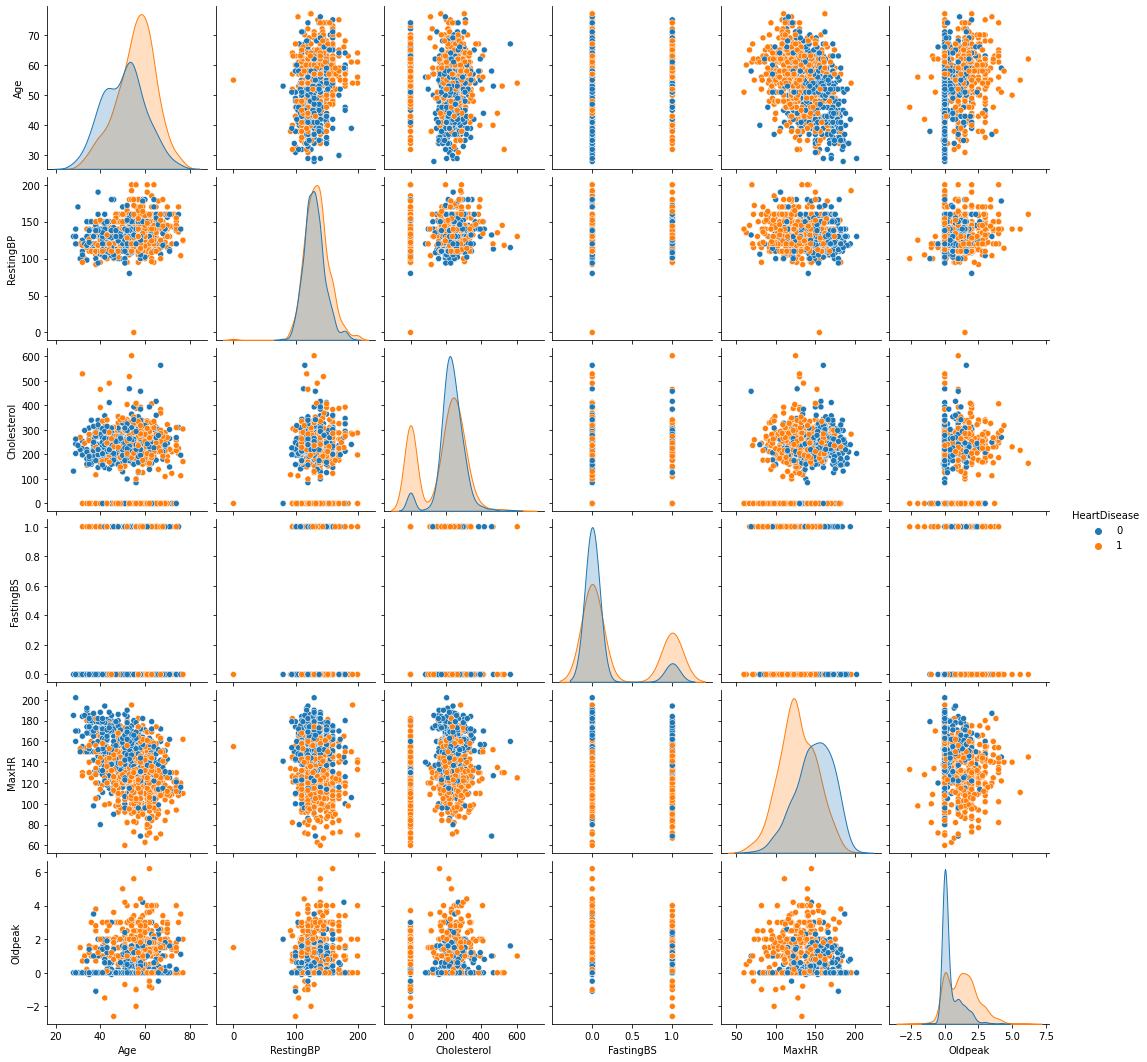

In [15]:
figure = plt.figure(figsize=(20,15))
sns.pairplot(heart_data[num_features], hue='HeartDisease')

<AxesSubplot:>

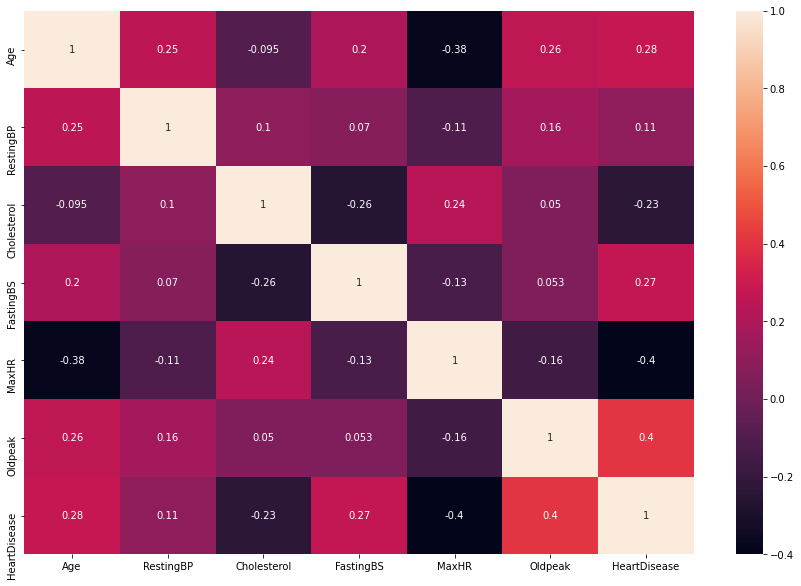

In [16]:
corr = heart_data.corr()
figure = plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [17]:
def dist_plots(df):
    for i, col in enumerate(df.columns,1):
        plt.subplot(4,3,i)
        plt.title(f"Distribution of {col} Data")
        sns.histplot(df[col], kde=True)
        plt.tight_layout()
        plt.plot()

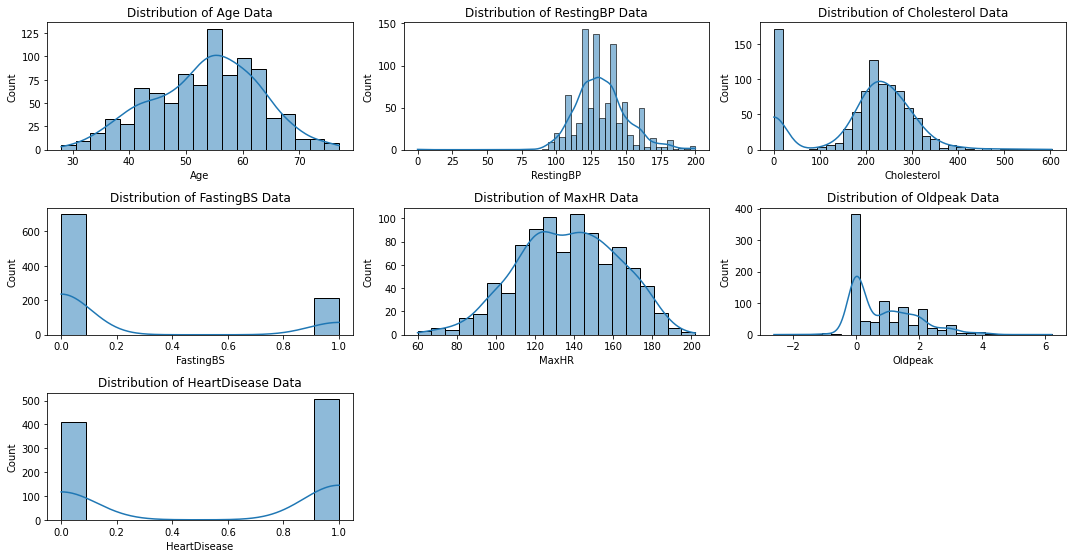

In [18]:
plt.figure(figsize=(15,10))
dist_plots(heart_data[num_features])

In [19]:
col_ex.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
412,56,M,ASY,125,0,1,Normal,103,Y,1.0,Flat,1
405,35,M,ASY,120,0,1,Normal,130,Y,1.2,Flat,1
406,57,M,ASY,140,0,1,Normal,100,Y,0.0,Flat,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1
408,59,M,ASY,110,0,1,Normal,94,N,0.0,Flat,1
409,53,M,NAP,160,0,1,LVH,122,Y,0.0,Flat,1
410,62,M,ASY,150,0,1,ST,78,N,2.0,Flat,1
411,54,M,ASY,180,0,1,Normal,150,N,1.5,Flat,1
413,56,M,NAP,125,0,1,Normal,98,N,-2.0,Flat,1


As we can see from the pairplot, distribution plots and correlation heatmap there are some additional features we have to deal with and investigate. 
Specifically need to deal with the large amount of cholestoral readings at 0
May need to consider how to deal with the lack of old peak data as well.

From the plots we can see there heatmap both maxHR and oldPeak almost have a significant correlation to heart disease 
age and maxHR also seem to have a slight correlation may need to check for collinearity to determine if these features need to be altered

Before we impute our values, deal with our outliers and normalize the data let's investigate the categorical features

The proporton of males w/0 heart disease is: 267 to 458
The proportion of females with heart disease is: 50 to 143
The ratio of disease among males is: 1.7153558052434457 
The ratio of disease among females is: 0.34965034965034963 


<ipython-input-20-3f3c6c03f5a6>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_with_0 = sex_heart_df[sex_heart_df.Sex.str.contains("M")][sex_heart_df.HeartDisease == 0]
<ipython-input-20-3f3c6c03f5a6>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_with_1 = sex_heart_df[sex_heart_df.Sex.str.contains("M")][sex_heart_df.HeartDisease == 1]
<ipython-input-20-3f3c6c03f5a6>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_with_0 = sex_heart_df[sex_heart_df.Sex.str.contains("F")][sex_heart_df.HeartDisease ==0]
<ipython-input-20-3f3c6c03f5a6>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_with_1 = sex_heart_df[sex_heart_df.Sex.str.contains("F")][sex_heart_df.HeartDisease == 1]


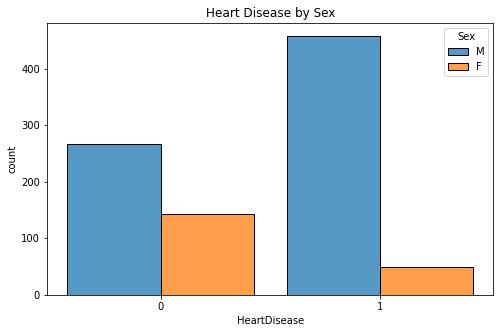

In [20]:
plt.figure(figsize=(8,5))
plt.title("Heart Disease by Sex")
plt.ylabel("count")
plt.xticks(ticks=[0, 1])

sex_heart_df = heart_data[['Sex', 'HeartDisease']]

male_with_0 = sex_heart_df[sex_heart_df.Sex.str.contains("M")][sex_heart_df.HeartDisease == 0]
male_with_1 = sex_heart_df[sex_heart_df.Sex.str.contains("M")][sex_heart_df.HeartDisease == 1]

female_with_0 = sex_heart_df[sex_heart_df.Sex.str.contains("F")][sex_heart_df.HeartDisease ==0]
female_with_1 = sex_heart_df[sex_heart_df.Sex.str.contains("F")][sex_heart_df.HeartDisease == 1]

sns.histplot(data=heart_data, x='HeartDisease', hue='Sex', multiple='dodge', discrete=True, shrink=0.85)

print(f"The proporton of males w/0 heart disease is: {len(male_with_0)} to {len(male_with_1)}")
print(f"The proportion of females with heart disease is: {len(female_with_1)} to {len(female_with_0)}")
print(f"The ratio of disease among males is: {len(male_with_1) / len(male_with_0)} ")
print(f"The ratio of disease among females is: {len(female_with_1) / len(female_with_0)} ")

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

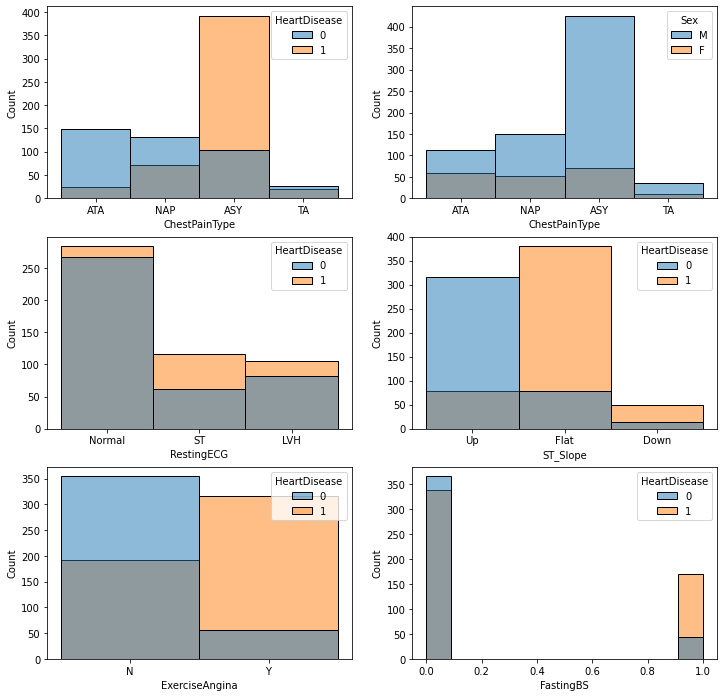

In [21]:
fig, axes = plt.subplots(3,2,figsize=(12,12))

sns.histplot(data=heart_data, x='ChestPainType', hue='HeartDisease', multiple='layer', ax=axes[0][0])
sns.histplot(data=heart_data, x='ChestPainType', hue='Sex', multiple='layer', ax=axes[0][1])
sns.histplot(data=heart_data, x='RestingECG', hue='HeartDisease', multiple='layer', ax=axes[1][0])
sns.histplot(data=heart_data, x='ST_Slope', hue='HeartDisease', multiple='layer', ax=axes[1][1])
sns.histplot(data=heart_data, x='ExerciseAngina', hue='HeartDisease', multiple='layer', ax=axes[2][0])
sns.histplot(data=heart_data, x='FastingBS', hue='HeartDisease', multiple='layer', ax=axes[2][1])

<AxesSubplot:xlabel='Age', ylabel='Oldpeak'>

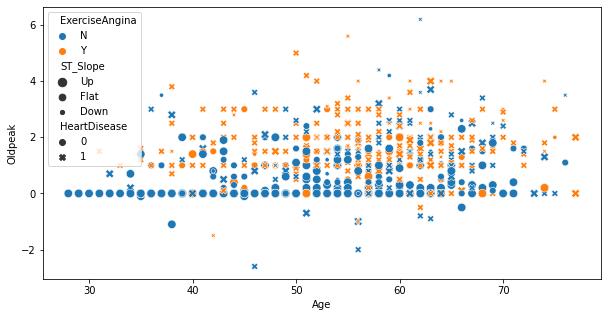

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=heart_data, x='Age', y='Oldpeak', hue='ExerciseAngina', size='ST_Slope', style='HeartDisease')

<AxesSubplot:xlabel='Age', ylabel='RestingBP'>

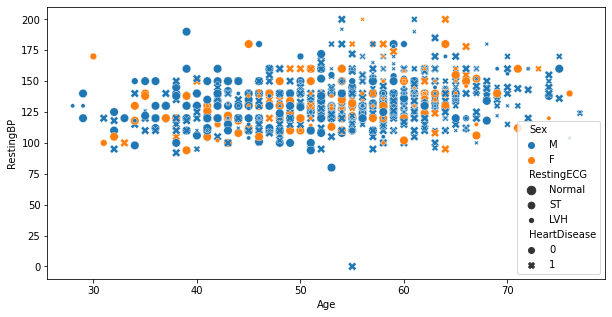

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=heart_data, x='Age', y='RestingBP', hue='Sex', size='RestingECG', style='HeartDisease')

In [24]:
def box_plots(data, df_num, cat_val, hue):
      for i, col in enumerate(df_num.columns,1):
        plt.subplot(4,3,i)
        plt.title(f"Distribution of {col} Data")
        sns.boxplot(data=data, x=df_num[col], y=cat_val, hue=hue)
        plt.tight_layout()
        plt.plot()

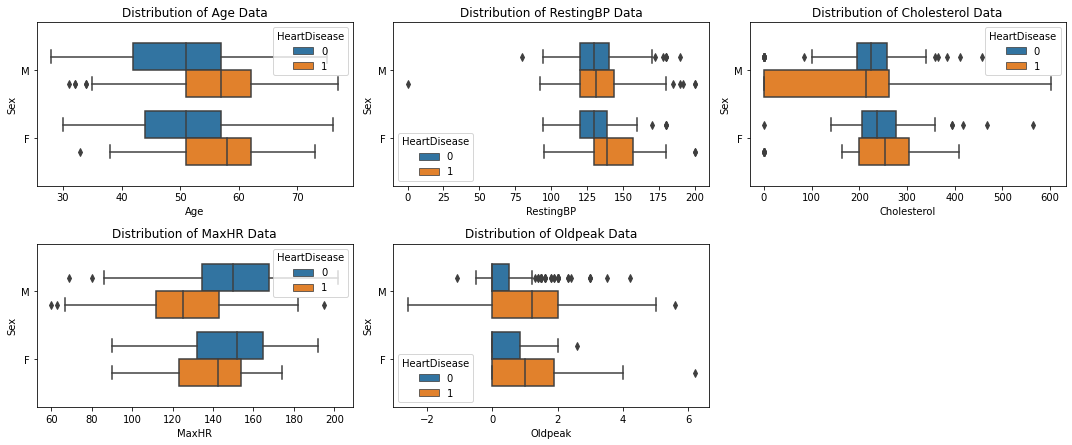

In [25]:
plt.figure(figsize=(15,12))

df_num = heart_data[num_features]
df_num = df_num.drop(labels=['HeartDisease', 'FastingBS'], axis=1)

box_plots(heart_data, df_num, 'Sex', 'HeartDisease')

In [26]:
cholesterol_df = pd.DataFrame(heart_data.Cholesterol)
cholesterol_df = cholesterol_df[cholesterol_df.Cholesterol != 0]


unique_values(cholesterol_df)

254    11
223    10
220    10
204     9
230     9
       ..
337     1
338     1
344     1
347     1
85      1
Name: Cholesterol, Length: 221, dtype: int64


In [27]:
mean = cholesterol_df.mean()
mean = mean.round(2)
print(mean)

chol_col = heart_data.Cholesterol
chol_col.replace(0, mean[0], inplace = True)

Cholesterol    244.64
dtype: float64


In [28]:
heart_data.drop(labels='Cholesterol', axis=1, inplace=True)

In [29]:
heart_data['Cholesterol'] = chol_col

In [30]:
from sklearn.preprocessing import MinMaxScaler

heart_data_origin = heart_data.copy()

heart_data['Sex'].dtype
if heart_data['Sex'].dtype != 'int64':
    heart_data['Sex'] = heart_data['Sex'].replace(to_replace=['M', 'F'], value=[1,0])
    
if heart_data['ExerciseAngina'].dtype != 'int64':
    heart_data['ExerciseAngina'] = heart_data['ExerciseAngina'].replace(to_replace=['N', 'Y'], value=[0,1])

heart_data = pd.get_dummies(heart_data)

scaler = MinMaxScaler()
heart_data_scaled = scaler.fit_transform(heart_data)

heart_data_clean = pd.DataFrame(heart_data_scaled, columns=heart_data.columns)
heart_data_clean.describe()

,Age,Sex,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Cholesterol,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.789760,0.661983,0.233115,0.540911,0.404139,0.396291,0.553377,0.308178,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283
std,0.192502,0.407701,0.092571,0.423046,0.179298,0.490992,0.121201,0.497414,0.102931,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.600000,0.000000,0.422535,0.000000,0.295455,0.000000,0.249035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,1.000000,0.650000,0.000000,0.549296,0.000000,0.363636,1.000000,0.308185,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.653061,1.000000,0.700000,0.000000,0.676056,1.000000,0.465909,1.000000,0.351351,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
def kde_plots(df):
    for i, col in enumerate(df.columns, 1):
        plt.subplot(4,3,i)
        plt.title(f"KDE plot for {col}")
        sns.kdeplot(df[col], color='purple')
        plt.tight_layout()
        plt.plot()

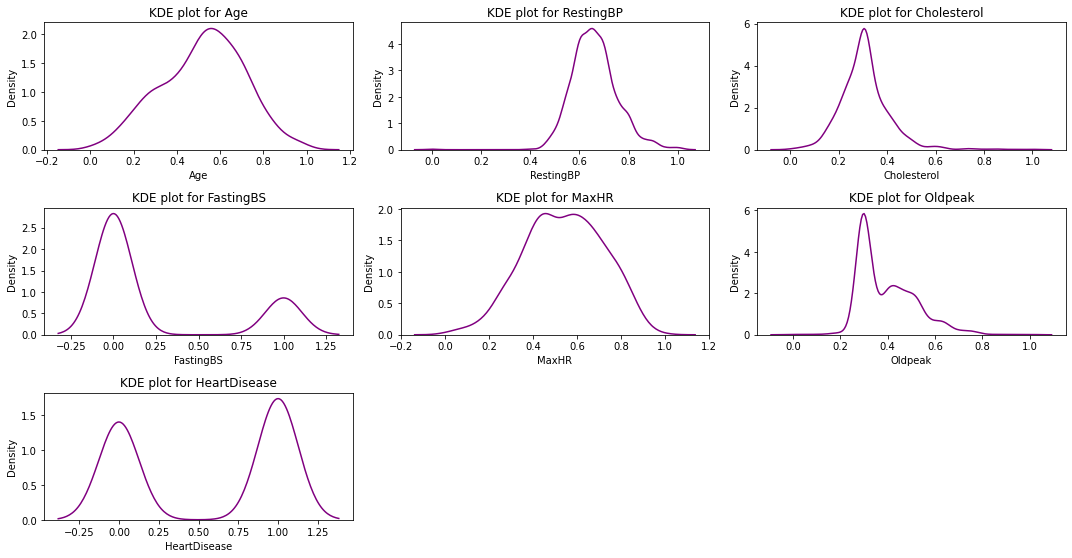

In [32]:
plt.figure(figsize=(15,10))
kde_plots(heart_data_clean[num_features])

In [36]:
Q1 = heart_data_clean.quantile(0.25)
Q3 = heart_data_clean.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                  0.265306
Sex                  0.000000
RestingBP            0.100000
FastingBS            0.000000
MaxHR                0.253521
ExerciseAngina       1.000000
Oldpeak              0.170455
HeartDisease         1.000000
Cholesterol          0.102317
ChestPainType_ASY    1.000000
ChestPainType_ATA    0.000000
ChestPainType_NAP    0.000000
ChestPainType_TA     0.000000
RestingECG_LVH       0.000000
RestingECG_Normal    1.000000
RestingECG_ST        0.000000
ST_Slope_Down        0.000000
ST_Slope_Flat        1.000000
ST_Slope_Up          1.000000
dtype: float64


In [37]:
heart_data_clean

#save the dataset for EDA of female data, implement pipeline to automate dataprocessing for like datasets??
heart_data_clean.to_csv('clean_heart.csv')

In [38]:
#modeling 
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, auc


In [39]:
target = heart_data['HeartDisease']
heart_data_clean.drop(labels='HeartDisease', axis=1, inplace=True)

In [40]:
print(target.shape)
print(heart_data_clean.shape)

X = heart_data_clean.copy()
y = target

(918,)
(918, 18)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(642, 18) (276, 18)
(642,) (276,)


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

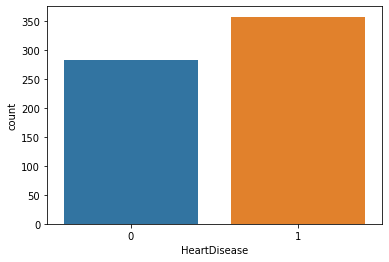

In [53]:
sns.countplot(data=heart_data_clean, x=y_train)

In [42]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("Score from train set is:", clf.score(X_train, y_train))
print("Score from test set is:", clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

acc = roc_auc_score(y_test, y_pred)
print("The accuracy of the model is:", acc)

print(acc)

Score from train set is: 0.8582554517133957
Score from test set is: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       126
           1       0.88      0.90      0.89       150

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

The accuracy of the model is: 0.8785714285714286
0.8785714285714286


In [43]:
confusion_matrix(y_test, y_pred)

array([[108,  18],
       [ 15, 135]], dtype=int64)

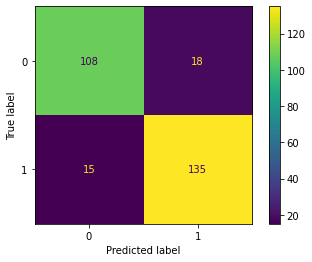

In [44]:
plot_confusion_matrix(clf, X_test, y_test)

In [45]:
def clf_fit_predict(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    print(f"The score for the train set is: {clf.score(X_train, y_train)}")
    print(f"The score for the test set is: {clf.score(X_test, y_test)}")
    
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    acc = roc_auc_score(y_test, y_pred)
    print(f"The accuracy of the model is: {acc}")
    
    plot_confusion_matrix(clf, X_test, y_test)


The score for the train set is: 1.0
The score for the test set is: 0.8731884057971014
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       126
           1       0.87      0.90      0.89       150

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

The accuracy of the model is: 0.8706349206349205


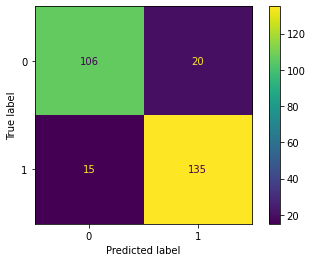

In [46]:
clf_fit_predict(RandomForestClassifier(), X_train, X_test, y_train, y_test)

[20:41:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The score for the train set is: 1.0
The score for the test set is: 0.8297101449275363
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       126
           1       0.84      0.85      0.84       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

The accuracy of the model is: 0.8274603174603176


C:\Users\JMumf\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


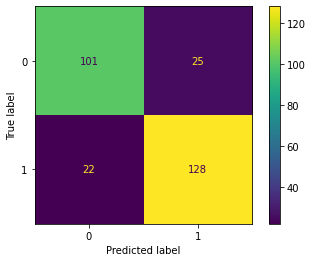

In [47]:
clf_fit_predict(XGBClassifier(), X_train, X_test, y_train, y_test)

The score for the train set is: 0.8348909657320872
The score for the test set is: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       126
           1       0.90      0.88      0.89       150

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

The accuracy of the model is: 0.8804761904761904


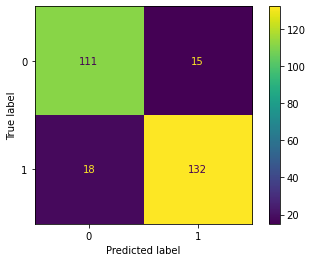

In [48]:
clf_fit_predict(GaussianNB(), X_train, X_test, y_train, y_test)

The score for the train set is: 0.8753894080996885
The score for the test set is: 0.8659420289855072
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       126
           1       0.86      0.90      0.88       150

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276

The accuracy of the model is: 0.8626984126984125


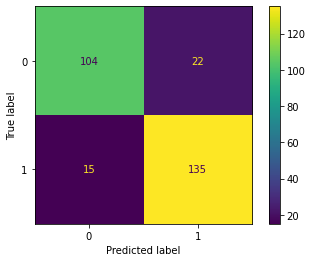

In [49]:
clf_fit_predict(SVC(), X_train, X_test, y_train, y_test)

The score for the train set is: 0.9750778816199377
The score for the test set is: 0.8768115942028986
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       126
           1       0.89      0.88      0.89       150

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

The accuracy of the model is: 0.8765079365079365


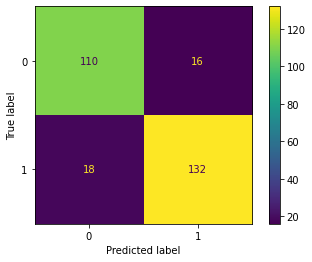

In [50]:
clf_fit_predict(CatBoostClassifier(silent=True), X_train, X_test, y_train, y_test)

The score for the train set is: 0.8753894080996885
The score for the test set is: 0.8405797101449275
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       126
           1       0.86      0.85      0.85       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

The accuracy of the model is: 0.8400000000000001


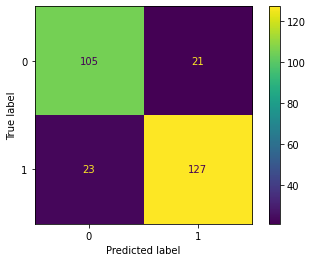

In [51]:
clf_fit_predict(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

In [83]:
gaussian = GaussianNB()
params = {'var_smoothing': [1,0.1, 0.01, 0.001, 0.0001, 0.000000001, 0.0000000001]}
scoring = {'ROC_AUC':'roc_auc', 'ACC':'accuracy', 'F_score':'f1', 'AvgPrecison':'average_precision'}
clf = GridSearchCV(gaussian, params, scoring=scoring, refit='ROC_AUC')
clf.fit(X_train, y_train)

print(clf.best_estimator_, clf.best_score_, clf.best_params_, clf.refit_time_, clf.multimetric_)
sorted(clf.cv_results_.keys())

y_pred = clf.predict(X_test)

acc = roc_auc_score(y_test, y_pred)
print(f"The accuracy of the model is: {acc}")

print(classification_report(y_test, y_pred))

GaussianNB(var_smoothing=1) 0.9126740339699012 {'var_smoothing': 1} 0.0009999275207519531 True
The accuracy of the model is: 0.8746031746031745
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       126
           1       0.88      0.90      0.89       150

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.88       276
weighted avg       0.88      0.88      0.88       276



In [ ]:
#try for hyperparameter tuning
estimators = [10, 64, 100, 128, 200, 256]
criterion = ['gini', 'entropy']

train_results = []
test_results = []

for est in estimators:
    rf = RandomForestClassifier(n_estimators=est, random_state=18)
    rf.fit(X_train, y_train)

    train_pred = rf.predict(X_train)

    false_positive, true_positive, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive, true_positive)
    train_results.append(roc_auc)

    y_pred = rf.predict(X_test)

    false_positive, true_positive, thresholds = roc_curve(y_test, y_pred)
    roc_auc =auc(false_positive, true_positive)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(estimators, train_results,'b', label="Train AUC")
line2, = plt.plot(estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('Estimators')
plt.show()